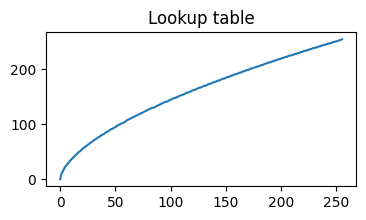

Gamma = 0.6


In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread(r'/Users/kavindujayathissa/Desktop/Academics/Semester 05/EN3160 Image Processing/Assignment A01/a1images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert f is not None

original = cv.cvtColor(f,cv.COLOR_BGR2RGB)
lab = cv.cvtColor(f,cv.COLOR_BGR2Lab)
L, a, b = cv.split(lab)
gamma = 0.6
t = np.array([(p/255.0)**(gamma)*255.0 for p in range (0,256)]).astype('uint8')

fig, ax = plt.subplots(1,1, figsize = (4,2))
ax.plot(t)
ax.set_title('Lookup table')
plt.show()

print("Gamma =", gamma)

plt.show()

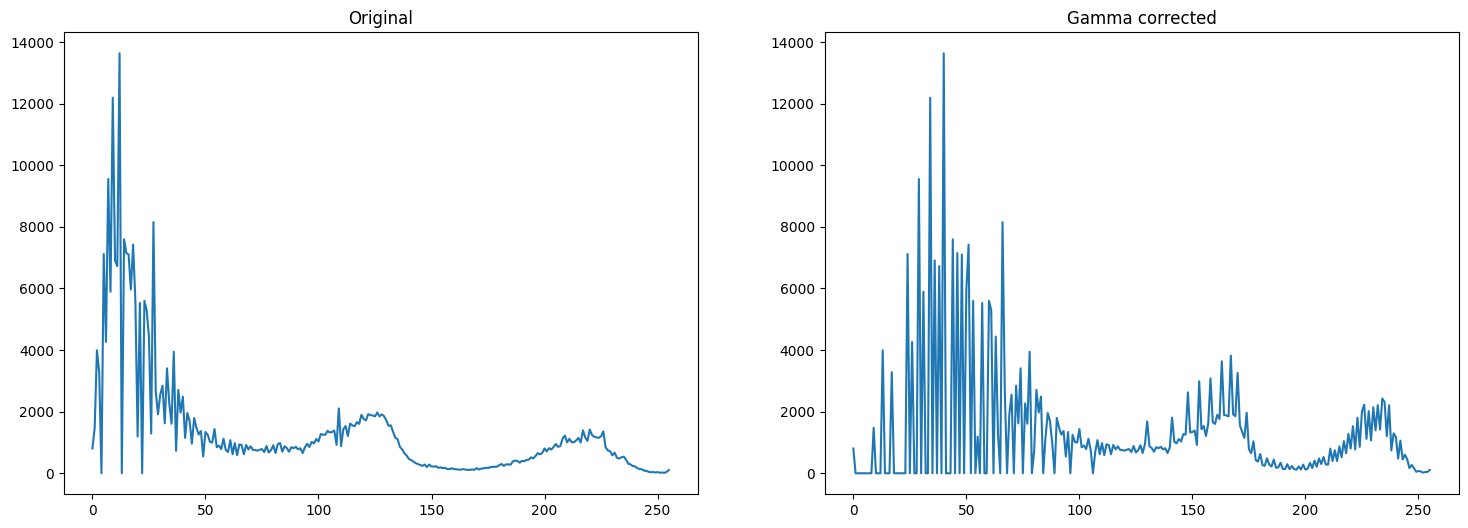

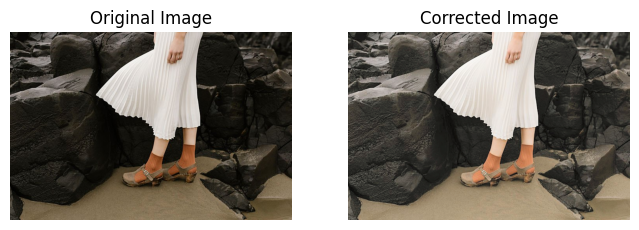

In [12]:
g = cv.LUT(L, t)
lab_orig = cv.cvtColor(f,cv.COLOR_BGR2Lab)
lab[:,:,0] = g

img = cv.cvtColor(lab, cv.COLOR_Lab2RGB).astype('uint8')
hist_original = cv.calcHist([lab_orig],[0],None,[256],[0,256])
hist_gamma = cv.calcHist([lab],[0],None,[256],[0,256])

fig, ar = plt.subplots(1,2, figsize =(18,6))
ar[1].plot(hist_gamma)
ar[1].set_title('Gamma corrected')
ar[0].plot(hist_original)
ar[0].set_title('Original')


fig, ar2 = plt.subplots(1,2, figsize = (8,3))
ar2[0].imshow(original)
ar2[0].axis('off')
ar2[0].set_title('Original Image')

ar2[1].imshow(img)
ar2[1].axis('off')
ar2[1].set_title('Corrected Image')

plt.show()